In [1]:
#import pkgs
import pandas as pd
import numpy as np
import requests
import string
import nltk
import matplotlib.pyplot as plt
from io import BytesIO
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to C:\Users\Ciaran
[nltk_data]     Mc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ciaran
[nltk_data]     Mc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Ciaran
[nltk_data]     Mc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Ciaran
[nltk_data]     Mc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
#load data from github
url = 'https://raw.githubusercontent.com/cmcswiggan/CIND820/main/SMS_Spam_Dataset'
data = requests.get(url).content
smsData = pd.read_csv(BytesIO(data), sep = '\t', header = None, names = ['Category', 'SMS Message'])

#check data loaded as expected
smsData.head()

,Category,SMS Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#assign stopwords and punctuation to variables
stopWords = nltk.corpus.stopwords.words('english')
punctuation = string.punctuation

In [4]:
#pre_Process function defined - list required for lemmatization step

def pre_Process(sms):
    
    #remove punctuation, toeknize and remove stopwords
    process = "".join([char.lower() for char in sms if char not in punctuation])
    tokenize = nltk.tokenize.word_tokenize(process)
    remove_stopwords = [word for word in tokenize if word not in stopWords]
    return remove_stopwords

#add processed column
smsData['Processed'] = smsData['SMS Message'].apply(lambda x: pre_Process(x))

#check dataframe data as anticipated
smsData.head()

,Category,SMS Message,Processed
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t..."


In [5]:
#define function for lemmatizing words

def lemm (sms):
    
    lem = [lemmatizer.lemmatize(word) for word in sms]
    return lem

#replace processed column with lemmatized column
smsData['Processed'] = smsData['Processed'].apply(lambda x: lemm(x))

#check dataframe data as anticipated
smsData.head()

,Category,SMS Message,Processed
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, go, usf, life, around, though]"


In [6]:
#split data into training/test set 70/30
sms_train, sms_test, label_train, label_test = train_test_split(smsData['Processed'], smsData['Category'], test_size = 0.3, random_state=25)

#labels as strings
label_train = label_train.astype('str')
label_test = label_test.astype('str')

In [7]:
#create lists containing all spam words and all ham words

def categorize():
    spam = []
    ham = []
    
    #spam words
    for sms in smsData['Processed'][smsData['Category'] == 'spam']:
        for word in sms:
            spam.append(word)
            
    #ham words
    for sms in smsData['Processed'][smsData['Category'] == 'ham']:
        for word in sms:
            ham.append(word)
    
    return spam, ham

spam, ham = categorize()

#check lists
print(spam[ :5])
print(ham[:5])

['free', 'entry', '2', 'wkly', 'comp']
['go', 'jurong', 'point', 'crazy', 'available']


In [8]:
#define standard prediction function

def predict(sms):
    spam_counter = 0
    ham_counter = 0
    
    #sum spam and ham words contained in message
    for word in sms:
        spam_counter += spam.count(word)
        ham_counter += ham.count(word)
     
    #predict based on volume of spam/ham words in test message, if equal will be considered spam
    if ham_counter > spam_counter:
        x = "ham"
    else:
        x = "spam"
    return x

In [9]:
#define classifier

def clf(sms):
    
    labels = []
    
    #loop prediction function over input message
    for message in sms:
        x = predict(message)
        labels.append(x)
    
    return (labels)

In [10]:
#run classifier over test data
predict_class = clf(sms_test)


True Positives: 138
False Positives: 17
True Negatives: 1426
False Negatives: 91
True Positive Rate: 60.26%
Specificity: 98.82%
False Positive Rate: 1.18%


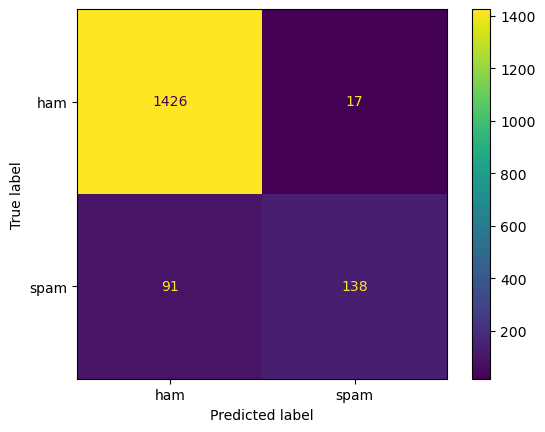

In [11]:
#assign true negatives, false postives, false negatives and true positives in confusion matrix
tn, fp, fn, tp = confusion_matrix(label_test, predict_class).ravel()

#assign variable to confusion matrix and print confusion matrix metrics

conf_mat = confusion_matrix(label_test, predict_class, labels = ['ham','spam'])
print(f'\nTrue Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')
print(f'True Positive Rate: { round((tp / (tp + fn))*100, 2)}%')
print(f'Specificity: { round((tn / (tn + fp))*100, 2)}%')
print(f'False Positive Rate: { round((fp / (fp + tn))*100, 2)}%')

cm_display = metrics.ConfusionMatrixDisplay(conf_mat, display_labels = ['ham', 'spam'])

cm_display.plot()
plt.show()